In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet_g')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('phi_electron')
    scalar.append('zg')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 92.7 seconds


In [4]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, '0.1 < y < 0.85', '0.1 < y < 0.85')
d = fixPhi(d, 'photon')
d = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.1 < y < 0.85 134309  fraction kept: 44.1
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 110644  fraction kept: 82.4


In [5]:
eq = 'qt = sqrt((pt_electron*cos(phi_electron)+pt_jet*cos(phi_jet))**2 + (pt_electron*sin(phi_electron)+pt_jet*sin(phi_jet))**2)'
eq_g = 'qt_g = sqrt((pt_electron*cos(phi_electron)+pt_jet_g*cos(phi_jet_g))**2 + (pt_electron*sin(phi_electron)+pt_jet_g*sin(phi_jet_g))**2)'
d.eval(eq, inplace=True)
d.eval(eq_g, inplace=True)
d.eval('nu = 0.533*Q2/x',inplace=True)
d1 = applyCut(d, '5 < pt_electron < 10', '5 < pt_electron < 10')
d2 = applyCut(d, '10 < pt_electron < 20', '10 < pt_electron < 20')
d3 = applyCut(d, '20 < pt_electron < 35', '20 < pt_electron < 35')

5 < pt_electron < 10 66281  fraction kept: 59.9
10 < pt_electron < 20 14383  fraction kept: 13.0
20 < pt_electron < 35 967  fraction kept: 0.9


In [8]:
print np.mean(keepOneJet(d1)['x']), np.mean(keepOneJet(d2)['x']), np.mean(keepOneJet(d3)['x'])


Remove extra jets 66212  fraction kept: 99.9
0.03789028 
Remove extra jets 14302  fraction kept: 99.4
0.13459116 
Remove extra jets 964  fraction kept: 99.7
0.35058257


In [9]:
print np.mean(keepOneJet(d1)['nu']), np.mean(keepOneJet(d2)['nu']), np.mean(keepOneJet(d3)['nu'])


Remove extra jets 66212  fraction kept: 99.9
1162.4923 
Remove extra jets 14302  fraction kept: 99.4
1183.565 
Remove extra jets 964  fraction kept: 99.7
1470.9365


In [16]:
def plot_qt(df, var_array, label_array, color_array):
    for i in range(0,len(var_array)):
        fig = plt.hist(df[var_array[i]], label=label_array[i], range=(0,6.0), bins=12, histtype='step', fill=True, alpha=0.5, stacked=True, normed=True, color=color_array[i], linewidth=2)
    return fig

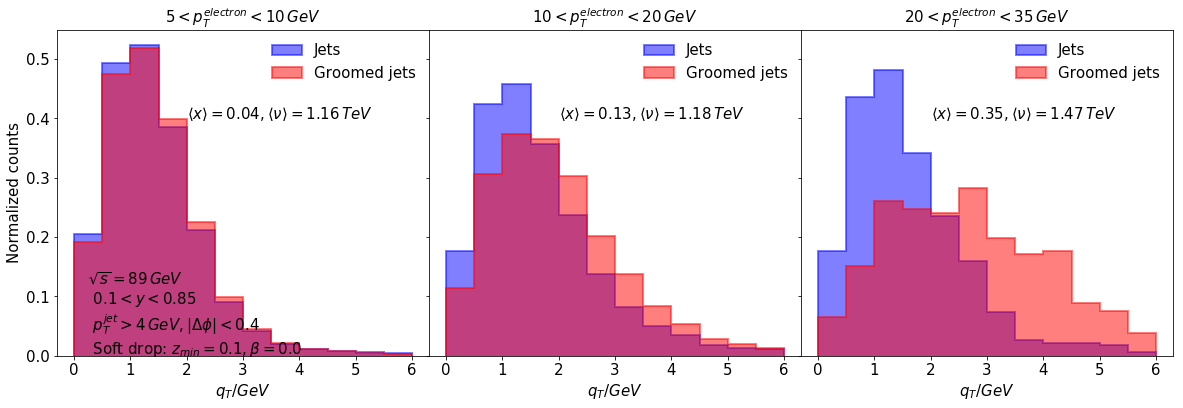

In [17]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1 = plt.subplot(131)
plot_qt(d1, ['qt','qt_g'], ['Jets','Groomed jets'], ['b','r'])
plt.xlabel('$q_T / GeV$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.25, 0, '$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, GeV, |\Delta \phi| < 0.4$ \n Soft drop: ' + r'$z_{min} = 0.1, \beta=0.0$', fontsize=15)
plt.text(2, 0.4, r'$\langle x \rangle = 0.04, \langle \nu \rangle = 1.16 \, TeV$',fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$5 < p_T^{electron} < 10 \, GeV$', fontsize=15)

ax2 = plt.subplot(132, sharey=ax1)
plot_qt(d2, ['qt','qt_g'], ['Jets','Groomed jets'], ['b','r'])
plt.xlabel('$q_T / GeV$', fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(2, 0.4, r'$\langle x \rangle = 0.13, \langle \nu \rangle = 1.18 \, TeV$',fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$10 < p_T^{electron} < 20 \, GeV$', fontsize=15)

ax3 = plt.subplot(133, sharey=ax1)
plot_qt(d3, ['qt','qt_g'], ['Jets','Groomed jets'], ['b','r'])
plt.xlabel('$q_T / GeV$', fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.text(2, 0.4, r'$\langle x \rangle = 0.35, \langle \nu \rangle = 1.47 \, TeV$',fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$20 < p_T^{electron} < 35 \, GeV$', fontsize=15)

plt.savefig('images/qt_1.pdf', bbox_inches='tight')